# **Amazon Data Science Books Dataset**

Link github: https://github.com/nguynking/amazon-books

# Load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/nguynking/amazon-books/main/dataset/final_book_dataset_kaggle2.csv")
df.shape

(830, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

# **Chương 3:**

## 1. Kiểm tra tình trạng bộ dữ liệu gốc

Bộ dữ liệu Amazon Data Science Books Dataset được thu thập cần phải kiểm tra các yếu tố về tình trạng đầu vào để làm sạch dữ liệu (Data cleaning/cleansing), loại bỏ nhiễu (remove noise) cũng như hiệu chỉnh những phần dữ liệu không nhất quán (correct data inconsistencies).

In [ ]:
print('Chi tiết bộ data')
print(df.info())
print(f'Số lượng phần tử bộ dữ liệu: {df.size}')
print(f'Số dòng và cột của bộ dữ liệu - (dòng, cột): {df.shape}')

Chi tiết bộ data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    o

Ta thấy bộ dữ liệu gồm 830 dòng và 19 cột. Với 2 kiểu dữ liệu chính là: Float (2 thuộc tính), Object (17 thuộc tính).


### 1.1. Kiểm tra dữ liệu lặp lại

In [ ]:
import pandas as pd
import numpy as np

# Check for duplicates
duplicates = df[df.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found. Rows to be removed:")
    print(duplicates)

No duplicates found.


### 1.2. Kiểm tra dữ liệu bị thiếu (missing values)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("Missing values found. Columns with missing values:")
    print(missing_values[missing_values > 0])

Missing values found. Columns with missing values:
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
dtype: int64


### 1.3. Kiểm tra dữ liệu ngoại lệ (outliers)

In [ ]:
# Validate numeric columns for outliers
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    # Assuming a simple Z-score based outlier detection method
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[abs(z_scores) > 3][col]
    if outliers.empty:
        print(f"No outliers found in column '{col}'.")
    else:
        print(f"Outliers found in column '{col}':")
        print(outliers)

Outliers found in column 'price':
248     250.63
638     743.47
677     287.14
734    1318.74
Name: price, dtype: float64
Outliers found in column 'avg_reviews':
56     3.0
137    1.0
258    3.0
260    3.0
311    2.8
343    3.0
399    1.0
405    3.0
637    1.0
724    2.7
Name: avg_reviews, dtype: float64


### 1.4. Kiểm tra định dạng dữ liệu và tính nhất quán của dữ liệu

In [ ]:
# Check for data format and consistency (specific to columns)
# Validating ISBN-13 format
invalid_isbn = df[~df['ISBN_13'].astype(str).str.match(r'^\d{3}-\d{10}$')]
if invalid_isbn.empty:
    print("All ISBN-13 codes are in valid format.")
else:
    print("Invalid ISBN-13 format found:")
    print(list(invalid_isbn['ISBN_13'].unique()))

Invalid ISBN-13 format found:
[nan, 'Research in Drama Education', ' ', '$13.99 ', '-34%', '     ', 'Usually ships within 2 to 3 days.', '#NAME?', '#250 in ', '#1 in ', '  Second Edition, Second edition ', '$113.19 ', '-22%', 'The Data Revolution', 'Regulating Alcohol around the World: Policy Cocktails', '-19%', '#35 in ', 'x', '-27%', '79', '99', '-21%', '75', 'Pratip Samanta', '49', '69', '29', '66', '-30%', '  Kindle Edition ', '$139.99 ', '$13.79 ', 'Python', '#372 in ', 'PennyLane', 'JOSH TYSON', '—', '-39%', '59', '39', '-25%', '30', '56', '25']


In [ ]:
# Validate URLs in link columns
# Check for valid URL format in 'link' and 'complete_link'
link_columns = ['complete_link']
for col in link_columns:
    invalid_urls = df[~df[col].str.startswith('https://www.amazon.com')]
    if invalid_urls.empty:
        print(f"All URLs in column '{col}' are valid Amazon URLs.")
    else:
        print(f"Invalid URLs found in column '{col}':")
        print(invalid_urls[col])

All URLs in column 'complete_link' are valid Amazon URLs.


## 2. Tiền xử lý dữ liệu

### 2.1. Xử lý định dạng dữ liệu (Data format)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Biến định lượng: `price (including) (float), price (float), pages (int), avg_reviews (float), n_reviews (int), star5 - star1 (float), weight (float)`

**Biến `weight`:** Đưa tất cả về ounces và chuyển thành kiểu `float`

In [ ]:
df['weight'].unique()

array(['2.53 pounds', '1.96 pounds', '1.4 pounds', '1.47 pounds',
       '1.3 pounds', nan, '1.2 pounds', '2.15 pounds', '1.28 pounds',
       '2.62 pounds', '1.01 pounds', '7.5 ounces', '1.93 pounds',
       '1.75 pounds', '15.5 ounces', '15.2 ounces', '11.4 ounces',
       '1.67 pounds', '14.3 ounces', '1.19 pounds', '2.04 pounds',
       '1.16 pounds', '3.53 ounces', '9.9 ounces', '1.5 pounds',
       '3.04 ounces', '1.54 pounds', '1.14 pounds', '13 ounces',
       '1.94 pounds', '2.8 pounds', '1.33 pounds', '14.4 ounces',
       '2.36 pounds', '2.05 pounds', '1.45 pounds', '2.4 pounds',
       '1.7 pounds', '1.52 pounds', '3.95 pounds', '7.1 ounces',
       '1.65 pounds', '1.46 pounds', '1.06 pounds', '2.83 pounds',
       '1.41 pounds', '30.2 pounds', '1.85 pounds', '1.51 pounds',
       '1 pounds', '1.35 pounds', '4.6 ounces', '2.01 pounds',
       '1.66 pounds', '1.1 pounds', '9 ounces', '14.1 ounces',
       '2.42 pounds', '1.09 pounds', '1.63 pounds', '1.64 pounds',
       '1.

In [ ]:
# 1. weight
import re
def preprocess_weight(weight):
    try:
        # Extract numeric values
        numeric_value = float(re.findall(r'^(.+) \w+', weight)[0])

        # Check for 'pounds' and convert to ounces
        if 'pounds' in weight:
            numeric_value *= 16.0  # 1 pound = 16 ounces

        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

processed_weight = [preprocess_weight(wei) for wei in df['weight']]
df['weight'] = processed_weight

# Display the processed weight column
print(df['weight'])

0      40.48
1      31.36
2      22.40
3      23.52
4      20.80
       ...  
825    15.50
826    36.00
827    17.60
828      NaN
829      NaN
Name: weight, Length: 830, dtype: float64


**Biến `star5 - star1`:** Chuyển giá trị trong các cột `star` từ phần trăm về dạng thập phân

In [ ]:
df['star5'].unique()

array(['55%', '61%', '87%', '75%', '52%', '84%', '100%', '78%', '73%',
       '91%', '63%', '81%', '48%', '72%', nan, '74%', '90%', '76%', '85%',
       '86%', '94%', '70%', '97%', '67%', '79%', '82%', '68%', '65%',
       '80%', '69%', '83%', '77%', '53%', '50%', '60%', '66%', '95%',
       '58%', '59%', '22%', '64%', '44%', '34%', '98%', '62%', '93%',
       '56%', '57%', '38%', '54%', '92%', '37%', '71%', '43%', '47%',
       '51%', '99%', '36%', '24%', '42%', '89%', '88%', '39%', '46%',
       '40%', '49%', '20%', '33%'], dtype=object)

In [ ]:
# 2. star5 - star1 (float)
star_columns = ['star5', 'star4', 'star3', 'star2', 'star1']
def preprocess_star(value):
    try:
        # Extract numeric values
        numeric_value = float(value) / 100.0
        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

for col in star_columns:
    df[col] = [preprocess_star(value) for value in df[col].str.replace(r'%', '')]

In [ ]:
df['star5']

0      0.55
1      0.61
2      0.87
3      0.75
4      0.52
       ... 
825    0.72
826    0.78
827    0.83
828     NaN
829    0.79
Name: star5, Length: 830, dtype: float64

**Biến `n_reviews`:** Xóa dấu `,` trong cột `n_reviews` và chuyển về kiểu `int`

In [ ]:
df['n_reviews'].unique()

array(['23', '124', '10', '1,686', '12', '31', '72', '205', '5', '14',
       '46', '201', '292', '20', '4', '1,358', nan, '386', '56', '1,330',
       '55', '10,103', '69', '172', '264', '274', '2,568', '509', '126',
       '102', '13', '38', '26', '57', '6', '171', '76', '16', '84', '24',
       '100', '32', '63', '2,362', '290', '232', '1', '281', '58', '2',
       '297', '60', '229', '42', '2,672', '101', '527', '21', '44', '493',
       '142', '28', '187', '3', '463', '54', '19', '137', '108', '442',
       '11', '279', '7', '110', '48', '254', '51', '9', '93', '119',
       '234', '39', '429', '735', '318', '175', '15', '25', '347', '174',
       '17', '26,560', '293', '29', '33', '53', '260', '40', '45', '78',
       '73', '81', '82', '410', '27', '8', '1,155', '3,443', '1,527',
       '196', '105', '61', '62', '50', '136', '22', '2,240', '1,984',
       '206', '183', '423', '116', '107', '268', '418', '273', '570',
       '235', '169', '91', '335', '36', '18', '298', '248', '16

In [ ]:
# 3. n_reviews (int)
df['n_reviews'] = df['n_reviews'].str.replace(r',', '', regex=True).astype("Int64")

In [ ]:
df['n_reviews']

0        23
1       124
2        10
3      1686
4        12
       ... 
825      74
826      93
827       8
828    <NA>
829     142
Name: n_reviews, Length: 830, dtype: Int64

**Biến `pages`:** Xóa dấu `,` và chuyển về kiểu `int`

In [ ]:
df['pages'].unique()

array(['500', '484', '274', '547', '368', nan, '360', '408', '230', '656',
       '333', '106', '528', '456', '249', '192', '234', '442', '301',
       '338', '550', '280', '1012', '88', '328', '24', '224', '387',
       '289', '100', '380', '240', '464', '559', '175', '397', '332',
       '630', '458', '720', '488', '392', '824', '304', '459', '384',
       '346', '276', '880', '716', '376', '745', '592', '640', '216',
       '118', '432', '128', '256', '129', '271', '526', '306', '400',
       '440', '147', '402', '576', '226', '472', '568', '506', '734',
       '131', '222', '266', '394', '352', '1040', '399', '125', '146',
       '608', '336', '350', '330', '832', '272', '1096', '178', '386',
       '560', '149',
       'Explores all features and functions in two-color  packed with screenshots, numbered steps, and other visual graphics that clearly show you how to accomplish tasks',
       '416', '379', '553', '483', '732', '712', '984', '428', '74', '6',
       '161', '536', '510'

In [ ]:
# 4. pages (int)
df['pages'] = df['pages'].str.replace(r',', '', regex=True)

def preprocess_pages(value):
    try:
        # Extract numeric values
        numeric_value = float(value)
        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

df['pages'] = [preprocess_pages(value) for value in df['pages']]
df['pages'] = df['pages'].astype("Int64")

In [ ]:
df['pages']

0       500
1       484
2       274
3       547
4       368
       ... 
825     208
826     573
827     288
828    <NA>
829    <NA>
Name: pages, Length: 830, dtype: Int64

**Biến `price (including used books)`:** Chuyển thành cột `min_price`

In [ ]:
df['price (including used books)'].unique()

array(['6.75', ' 21.49 - 33.72 ', '32.07', '53.99', '24.49', nan, '40.49',
       '90', ' 53.98 - 54.19 ', ' 47.97 - 56.99 ', '20', '15.97', '28.6',
       '39.99', '24.99', '10.69', '19.38', ' 36.00 - 49.99 ', '29.99',
       '24.2', '9.99', '68.59', ' 47.10 - 51.95 ', ' 25.50 - 50.99 ',
       '54.99', '10.74', '13.99', '0.99', ' 19.36 - 28.99 ', '44.49',
       '27.99', ' 33.92 - 36.99 ', ' 45.49 - 59.20 ', '32.99', '14',
       '40.99', ' 44.79 - 44.99 ', '49.99', ' 13.49 - 27.99 ',
       ' 50.99 - 55.32 ', ' 85.57 - 105.99 ', '31.99', ' 24.50 - 75.24 ',
       '34.95', ' 8.99 - 11.69 ', '30.99', ' 51.45 - 52.21 ',
       ' 19.99 - 22.58 ', '29.95', ' 91.00 - 97.99 ', '21.09', '48.99',
       ' 34.35 - 71.91 ', '26.49', '69', '18.39', '11.97', '34.49',
       ' 15.99 - 25.00 ', ' 23.01 - 45.98 ', ' 11.36 - 17.99 ',
       ' 28.21 - 28.49 ', '25', ' 30.99 - 31.30 ', '12.99',
       ' 54.24 - 56.95 ', '41.99', ' 23.65 - 57.34 ', '77.07', '28.99',
       ' 28.97 - 121.99 ', ' 46.95 -

In [ ]:
# Lấy giá thấp nhất trong cột 'price (including used books)' và đưa sang cột min_price
def preprocess_price(price):
    try:
        min_price = float(re.split(r'-', price)[0])
        return min_price
    except:
        return np.nan  # Return NaN for non-convertible values
df['min_price'] = [preprocess_price(price) for price in df['price (including used books)']]

In [ ]:
print(df['min_price'])

0       6.75
1      21.49
2      32.07
3      53.99
4      24.49
       ...  
825     8.55
826    52.41
827    44.99
828      NaN
829    38.49
Name: min_price, Length: 830, dtype: float64


**Biến định tính: `title, author, dimensions, language, publisher, ISBN_13, link, complete_link`**

**Split Multiple Authors:** If there are multiple authors separated by a comma, you can split them into separate strings or create a list of authors for each book.

**Remove Extra Characters:** Eliminate any additional characters such as brackets, quotes, or et al. (if they're not meaningful) to clean the author names.

**Handle Missing Values:** If there are NaN or empty values, you might choose to replace them with a default value or perform imputation.

**Normalize Names:** Ensure consistency in author names by standardizing them. For example, converting all names to title case.

**Create Binary Flags:** If needed, create binary flags indicating whether a book has multiple authors or not.

1. Biến `title`

In [ ]:
# 1. title
df['title'].isna().sum()

0

2. Biến `author`

In [ ]:
# 2. author
df['author'].unique()

array(['[ Dr Dhaval Maheta]', nan, '[ Oz du Soleil,  and , Bill Jelen]',
       '[ William McKinney]', '[ Paul McFedries]', '[ Cathy Tanimura]',
       '[ Matthew B. Miles, A. Michael Huberman, et al.]',
       '[ Gunnar Carlsson,  and , Mikael Vejdemo-Johansson]',
       '[ Robert I. Kabacoff]', '[ Chad Knowles]',
       '[ Programming Languages Academy, Matthew Kinsey, et al.]',
       '[ Ekaterina Kochmar]', '[ Walter Shields]',
       '[ Programming Languages Academy]',
       '[ Antoine Jacquier, Oleksiy Kondratyev, et al.]', '[ Dan Bader]',
       '[ Allen B. Downey]', '[ Jake VanderPlas]', '[ Nicolas Vandeput]',
       '[ Lee Vaughan]', '[ Luciano Ramalho]', '[ Leonard J. Ledger]',
       '[ Mike Cohen]', '[ Jonelle Hoop]', '[ DK]',
       '[ Charles R. Severance, Aimee Andrion, et al.]',
       '[ Donald P. Wilson]', '[ Yves Hilpisch]', '[ Yuli Vasiliev]',
       '[ Ronald T. Kneusel]', '[ Scott Mccoy]', '[ Patrick Viafore]',
       '[ JOE WEBINAR]', '[ Jules Damji, Brooke Weni

In [ ]:
# Preprocessing function to clean author names
def preprocess_authors(author):
    if pd.isnull(author):  # Handling NaN values
        return np.nan

    # Remove unwanted characters, split multiple authors and normalize the names (title)
    author = re.sub(r'[\[\]]|et al.|\sand', '', author)
    cleaned_author = [name.strip().title() for name in re.split(r'\s*,+\s*', author) if name != '']

    return cleaned_author  # Convert to title case

# Apply the preprocessing function to the author data
df['author'] = [preprocess_authors(a) for a in df['author']]
print(df['author'])

0                     [Dr Dhaval Maheta]
1                                    NaN
2             [Oz Du Soleil, Bill Jelen]
3                     [William Mckinney]
4                       [Paul Mcfedries]
                     ...                
825       [Michael Fullan, Joanne Quinn]
826    [Matthew F. Dixon, Igor Halperin]
827        [Yong Liu, Dr. Matei Zaharia]
828                                  NaN
829                   [Laurence Moroney]
Name: author, Length: 830, dtype: object


3. Biến `dimensions`

In [ ]:
# 3. dimensions
df['dimensions'].unique()

array(['8.5 x 1.01 x 11 inches', '8 x 0.98 x 9.25 inches',
       '8.25 x 0.6 x 10.75 inches', '7 x 1.11 x 9.19 inches',
       '7.38 x 0.83 x 9.25 inches', nan, '6.75 x 0.75 x 8.75 inches',
       '8.5 x 0.92 x 11 inches', '6.75 x 0.75 x 9.75 inches',
       '7.38 x 1.5 x 9.25 inches', '6 x 0.9 x 9 inches',
       '6 x 0.24 x 9 inches', '6 x 1.19 x 9 inches',
       '7.38 x 1.1 x 9.25 inches', '7.5 x 0.57 x 9.25 inches',
       '7.25 x 0.5 x 9 inches', '6 x 0.53 x 9 inches',
       '7.5 x 1 x 9.25 inches', '6 x 0.68 x 9 inches',
       '7 x 0.75 x 9 inches', '7.5 x 5.5 x 0.5 inches; 3.2 Ounces',
       '7 x 1.19 x 9.19 inches', '9.5 x 0.7 x 6.6 inches',
       '7 x 2 x 9.25 inches', '8.5 x 0.2 x 11 inches',
       '7 x 0.5 x 9.25 inches', '6 x 0.06 x 9 inches',
       '7.75 x 0.63 x 9.19 inches', '7.01 x 0.61 x 9.17 inches',
       '7 x 0.9 x 9.1 inches', '7 x 0.71 x 9.25 inches',
       '7.06 x 1.13 x 9.25 inches', '7.75 x 1.5 x 9.75 inches',
       '7 x 1 x 9 inches', '7 x 0.4 x 10 

In [ ]:
# Extract weight from the dimensions column and impute to the weight column
to_replace = df[df['dimensions'].str.contains(r'Pounds|Ounces', na=False)][['dimensions', 'weight']]
extract_weight = [preprocess_weight(wei) for wei in to_replace['dimensions'].str.extract(r';\s(.*)$')[0]]
df.loc[to_replace.index, 'weight'] = extract_weight

# Delete weights from dimensions column
df.loc[:, 'dimensions'] = df['dimensions'].str.replace(r';.+$', '', regex=True)

In [ ]:
# Loại bỏ từ 'inches', tách dimensions thành length, width, height, đổi inches -> cm và tạo column 'volume'
def preprocess_dimensions(dimension):
    try:
        dimension = re.sub(r'inches', '', dimension)
        # Chuyển thành kiểu float và chuyển inches -> cm
        length, width, height = [float(num) * 2.54 for num in re.split(r'x', dimension)]
        volume = length * width * height
        return volume
    except:
        return np.nan  # Return NaN for non-convertible values

df['volume'] = [preprocess_dimensions(dim) for dim in df['dimensions']]

4. Biến `language`

In [ ]:
df['language'].unique()

array(['English', nan, 'Spanish',
       'Unqualified, Japanese (Dolby Digital 2.0 Mono), English (Dolby Digital 5.1), English (Dolby Digital 2.0 Mono)',
       'you will discover all you need ',
       '• How to make better business decisions using ',
       'Concepts are presented in a "to-the-point" style to cater to the busy individual. With this book, you can learn Python in just one day and start coding immediately. ',
       'standard library',
       'This Python programming guide assumes certain level of programming knowledge. It is not a beginner textbook.',
       'Scroll to the top of the page and click the ',
       'English (Dolby Digital 2.0 Mono)',
       'English (DTS-HD Master Audio 5.1), French (DTS-HD 2.0)',
       '"Brilliant."'], dtype=object)

In [ ]:
def preprocess_language(lang):
    try:
        lang = re.findall(r'English|Japanese|French|Spanish', lang)
        lang = set(lang) if lang[0] != '' else np.nan
        lang = ', '.join(lang)
        return lang
    except:
        return np.nan  # Return NaN for non-convertible values
df['language'] = [preprocess_language(lang) for lang in df['language']]

In [ ]:
df['language'].unique()

array(['English', nan, 'Spanish', 'English, Japanese', 'English, French'],
      dtype=object)

5. Biến `publisher`

In [ ]:
df['publisher'].unique()

array(['Notion Press Media Pvt Ltd (November 22, 2021)',
       "O'Reilly Media; 1st edition (August 18, 2009)",
       'Holy Macro! Books; Third edition (August 1, 2022)',
       "O'Reilly Media; 2nd edition (November 14, 2017)",
       'For Dummies; 5th edition (February 3, 2022)', nan,
       "O'Reilly Media; 1st edition (October 5, 2021)",
       'SAGE Publications, Inc; 4th edition (January 22, 2019)',
       'Cambridge University Press; 1st edition (March 24, 2022)',
       'Manning; 3rd edition (May 3, 2022)',
       'University of Chicago Press (October 15, 2021)',
       'Independently published (September 21, 2022)',
       'Kenneth M Fornari (November 10, 2022)',
       'Manning (October 18, 2022)',
       'ClydeBank Media LLC; Illustrated edition (November 18, 2019)',
       'In Easy Steps Limited; 2nd edition (August 28, 2018)',
       'Independently published (May 2, 2020)',
       'Packt Publishing (October 31, 2022)',
       'Dan Bader; 1st edition (October 25, 2017)',


In [ ]:
publisher_repl = df[~df['publisher'].str.contains(r'[()]', na=True)]['publisher']
df.loc[publisher_repl.index, 'publisher'] = np.nan

In [ ]:
def preprocess_time(publisher):
    try:
        time = re.findall(r'.*\(?.*\)?.*\((.+)\)$', publisher)
        return time[0].strip()
    except:
        return np.nan

def preprocess_edition(publisher):
    try:
        edition = re.findall(r';(.+)edition|ed\.', publisher)
        return edition[0].strip()
    except:
        return np.nan

def preprocess_publisher(publisher):
    try:
        publisher = [p.strip() for p in re.findall(r'^(.*);|^(.*)\(', publisher)[0] if p != '']
        return publisher[0].strip()
    except:
        return np.nan

df['time'] = [preprocess_time(publisher) for publisher in df['publisher']]
df['edition'] = [preprocess_edition(publisher) for publisher in df['publisher']]
df['publisher'] = [preprocess_publisher(publisher) for publisher in df['publisher']]

In [ ]:
def preprocess_year(time):
    try:
        year = int(re.findall(r'(\d+)$', time)[0])
        return year
    except:
        return np.nan

df['publish_year'] = [preprocess_year(time) for time in df['time']]
# df['publish_year'] = df['publish_year'].astype('Int64')

In [ ]:
print(df['publish_year'])

0      2021.0
1      2009.0
2      2022.0
3      2017.0
4      2022.0
        ...  
825    2017.0
826    2020.0
827    2022.0
828       NaN
829       NaN
Name: publish_year, Length: 830, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         737 non-null    Int64  
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    Int64  
 7   star5                         702 non-null    float64
 8   star4                         635 non-null    float64
 9   star3                         554 non-null    float64
 10  star2                         451 non-null    float64
 11  star1                         328 non-null    float64
 12  dimensions                    644 non-null    object 
 13  weigh

6. Biến `ISBN_13`

In [ ]:
# Validating ISBN-13 format
invalid_isbn = df[~df['ISBN_13'].str.contains(r'^\d{3}-\d{10}$', na=False)]['ISBN_13']
df.loc[invalid_isbn.index, 'ISBN_13'] = np.nan

Drop các columns không cần thiết.

In [ ]:
drop_columns = ['price (including used books)', 'dimensions', 'ISBN_13', 'link', 'complete_link', 'time', 'edition']
df.drop(columns=drop_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         830 non-null    object 
 1   author        657 non-null    object 
 2   price         722 non-null    float64
 3   pages         737 non-null    Int64  
 4   avg_reviews   702 non-null    float64
 5   n_reviews     702 non-null    Int64  
 6   star5         702 non-null    float64
 7   star4         635 non-null    float64
 8   star3         554 non-null    float64
 9   star2         451 non-null    float64
 10  star1         328 non-null    float64
 11  weight        660 non-null    float64
 12  language      752 non-null    object 
 13  publisher     713 non-null    object 
 14  min_price     722 non-null    float64
 15  volume        644 non-null    float64
 16  publish_year  713 non-null    float64
dtypes: Int64(2), float64(11), object(4)
memory usage: 112.0+ KB


### 2.2. Xử lý dữ liệu bị thiếu (Missing values)

In [ ]:
# Xóa những dòng có hơn 60% các giá trị bị thiếu
threshold = 0.4
df.dropna(thresh=df.shape[1] * threshold, inplace=True, axis=0)

In [ ]:
# Xác định các cột có giá trị bị thiếu
columns_with_missing = df.columns[df.isnull().any()]
missing_counts = df[columns_with_missing].isnull().sum()

print("Các cột có dữ liệu bị thiếu:")
print(missing_counts)

Các cột có dữ liệu bị thiếu:
author          149
price            64
pages            56
avg_reviews      85
n_reviews        85
star5            85
star4           151
star3           231
star2           334
star1           457
weight          125
language         42
publisher        73
min_price        64
volume          141
publish_year     73
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 829
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         785 non-null    object 
 1   author        636 non-null    object 
 2   price         721 non-null    float64
 3   pages         729 non-null    Int64  
 4   avg_reviews   700 non-null    float64
 5   n_reviews     700 non-null    Int64  
 6   star5         700 non-null    float64
 7   star4         634 non-null    float64
 8   star3         554 non-null    float64
 9   star2         451 non-null    float64
 10  star1         328 non-null    float64
 11  weight        660 non-null    float64
 12  language      743 non-null    object 
 13  publisher     712 non-null    object 
 14  min_price     721 non-null    float64
 15  volume        644 non-null    float64
 16  publish_year  712 non-null    float64
dtypes: Int64(2), float64(11), object(4)
memory usage: 111.9+ KB


Điền giá trị `Unknown` cho giá trị bị thiếu đối với các cột có kiểu dữ liệu `object`

In [ ]:
unknown_cols = ['author', 'language', 'publisher', 'publish_year']
for col in unknown_cols:
    df[col].fillna(value='Unknown', inplace=True)
df.isna().sum()

title             0
author            0
price            64
pages            56
avg_reviews      85
n_reviews        85
star5            85
star4           151
star3           231
star2           334
star1           457
weight          125
language          0
publisher         0
min_price        64
volume          141
publish_year      0
dtype: int64

Điền giá trị `median` cho giá trị bị thiếu đối với các cột có kiểu dữ liệu `numeric`

In [ ]:
median_cols = ['price', 'avg_reviews', 'weight', 'min_price', 'volume']
for col in median_cols:
    df[col].fillna(value=df[col].median(), inplace=True)
df.isna().sum()

title             0
author            0
price             0
pages            56
avg_reviews       0
n_reviews        85
star5            85
star4           151
star3           231
star2           334
star1           457
weight            0
language          0
publisher         0
min_price         0
volume            0
publish_year      0
dtype: int64

Điền giá trị `median` cho giá trị bị thiếu đối với các cột có kiểu dữ liệu có dạng `integer`.

In [ ]:
int_median_cols = ['pages', 'n_reviews']
for col in int_median_cols:
    df[col].fillna(value=int(df[col].median()), inplace=True)
df.isna().sum()

title             0
author            0
price             0
pages             0
avg_reviews       0
n_reviews         0
star5            85
star4           151
star3           231
star2           334
star1           457
weight            0
language          0
publisher         0
min_price         0
volume            0
publish_year      0
dtype: int64

Điền giá trị `0` cho giá trị bị thiếu đối với các cột `star`.

In [ ]:
star_columns = ['star5', 'star4', 'star3', 'star2', 'star1']
for col in star_columns:
    df[col].fillna(value=0, inplace=True)
df.isna().sum()

title           0
author          0
price           0
pages           0
avg_reviews     0
n_reviews       0
star5           0
star4           0
star3           0
star2           0
star1           0
weight          0
language        0
publisher       0
min_price       0
volume          0
publish_year    0
dtype: int64

Kết quả sau khi xử lý:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 829
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         785 non-null    object 
 1   author        785 non-null    object 
 2   price         785 non-null    float64
 3   pages         785 non-null    Int64  
 4   avg_reviews   785 non-null    float64
 5   n_reviews     785 non-null    Int64  
 6   star5         785 non-null    float64
 7   star4         785 non-null    float64
 8   star3         785 non-null    float64
 9   star2         785 non-null    float64
 10  star1         785 non-null    float64
 11  weight        785 non-null    float64
 12  language      785 non-null    object 
 13  publisher     785 non-null    object 
 14  min_price     785 non-null    float64
 15  volume        785 non-null    float64
 16  publish_year  785 non-null    object 
dtypes: Int64(2), float64(10), object(5)
memory usage: 111.9+ KB


**Các thay đổi đã thực hiện:**
- **`min_price`:** Giá tiền thấp nhất của cuốn sách, được trích xuất từ cột `price (including used books)`.
- **`volume`:** Thể tích của cuốn sách, được trích xuất từ cột `dimensions`.
- **`publish_date`, `publish_month`, `publish_year`:** Ngày, tháng và năm xuất bản, được trích xuất từ cột `publisher`.

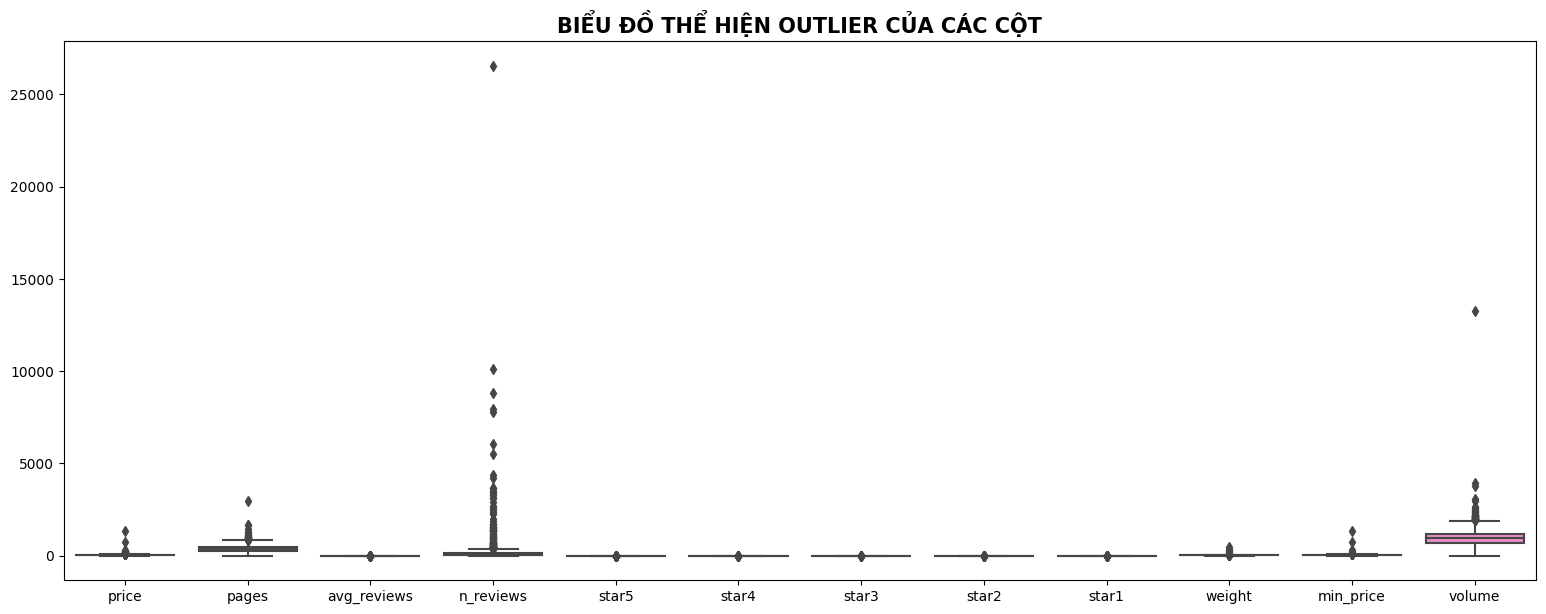

In [ ]:
non_numerical_cols = list(df.dtypes[df.dtypes==object].index)
numerical_data = df.drop(non_numerical_cols, axis=1)
plt.subplots(figsize = (19,7))
sns.boxplot(data=numerical_data)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT', fontsize=15, fontweight='bold')
plt.show()

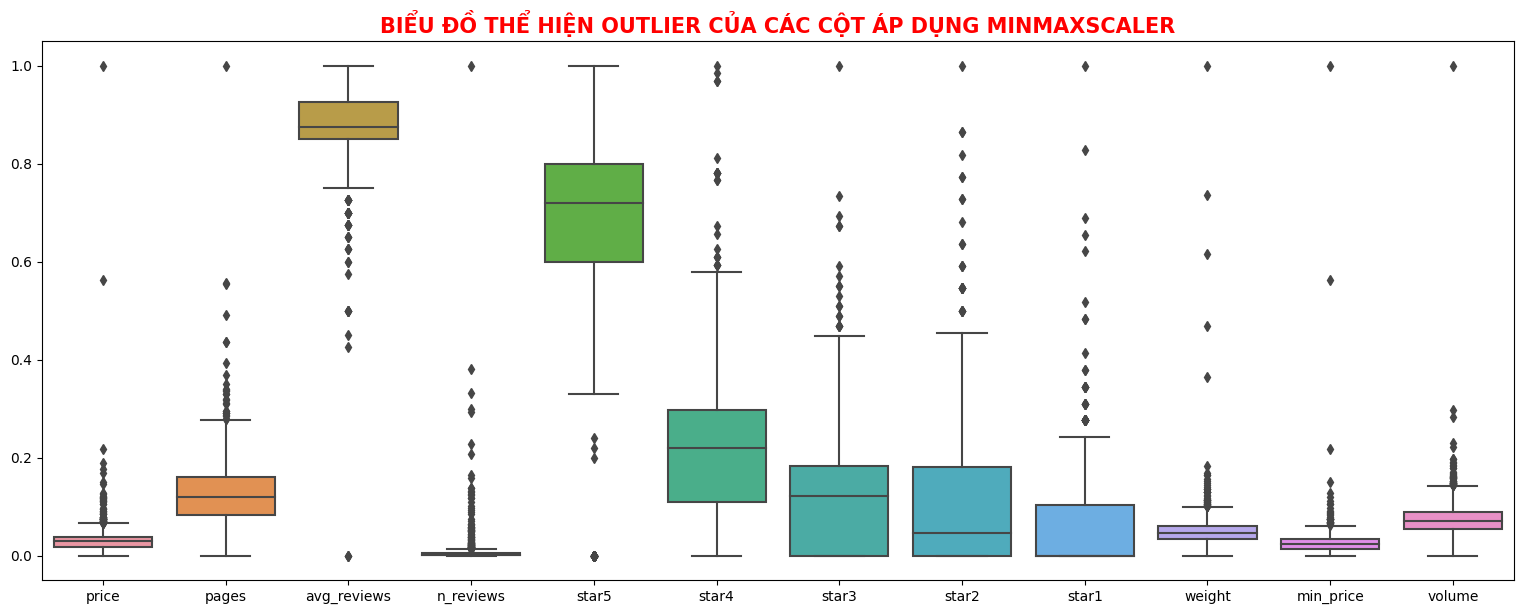

In [ ]:
scaler = MinMaxScaler()
numerical_data = df[df.columns[df.dtypes != 'object']]
sa = scaler.fit_transform(numerical_data)
sd = pd.DataFrame(sa,columns=numerical_data.columns)
plt.subplots(figsize = (19,7))
sns.boxplot(data = sd)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT ÁP DỤNG MINMAXSCALER',fontsize=15,color = 'red',fontweight='bold')
plt.show()

# Chương 4. Phân tích và biểu diễn trực quan các thuộc tính sử dụng trong báo cáo của bộ dữ liệu sau tiền xử lý

### Phân tích đơn biến

#### Phân tích số trang (pages)
Phân phối số trang

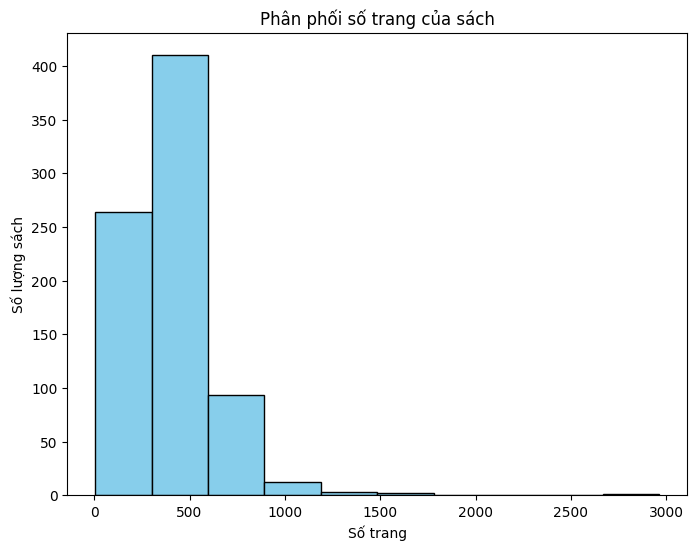

In [ ]:
# Biểu đồ phân phối số trang
plt.figure(figsize=(8, 6))
plt.hist(df['pages'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân phối số trang của sách')
plt.xlabel('Số trang')
plt.ylabel('Số lượng sách')
plt.savefig('pages.pdf', bbox_inches='tight')

Top 10 quyển sách có nhiều trang nhất

In [ ]:
pd.set_option('display.max_colwidth', True)
# Chọn top 10 sách có nhiều trang nhất dựa trên cột 'pages'
books_most_pages = df.nlargest(10, 'pages')
# In ra kết quả
books_most_pages[['title', 'author', 'pages']]

,title,author,pages
638,"Database Technologies: Concepts, Methodologies, Tools, and Applications",[John Erickson],2962
629,Learning Python: Powerful Object-Oriented Programming,Unknown,1650
630,"Learning Python, 5th Edition",Unknown,1643
442,"Python 3 Standard Library by Example, The (Developer's Library)",Unknown,1456
269,An Introduction to Statistical Methods and Data Analysis,"[R. Lyman Ott, Micheal T. Longnecker]",1296
210,"Introduction to Algorithms, 3rd Edition (The MIT Press)","[Thomas H. Cormen, Charles E. Leiserson]",1292
365,Microsoft Excel Data Analysis and Business Modeling (Office 2021 and Microsoft 365) (Business Skills),[Wayne Winston],1168
113,"Econometric Analysis of Cross Section and Panel Data, second edition (The MIT Press)",[Jeffrey M. Wooldridge],1096
102,"Pharmacokinetic and Pharmacodynamic Data Analysis: Concepts and Applications, Second Edition","[Johan Gabrielsson, Daniel Weiner]",1040
26,"Fluent Python: Clear, Concise, and Effective Programming",[Luciano Ramalho],1012


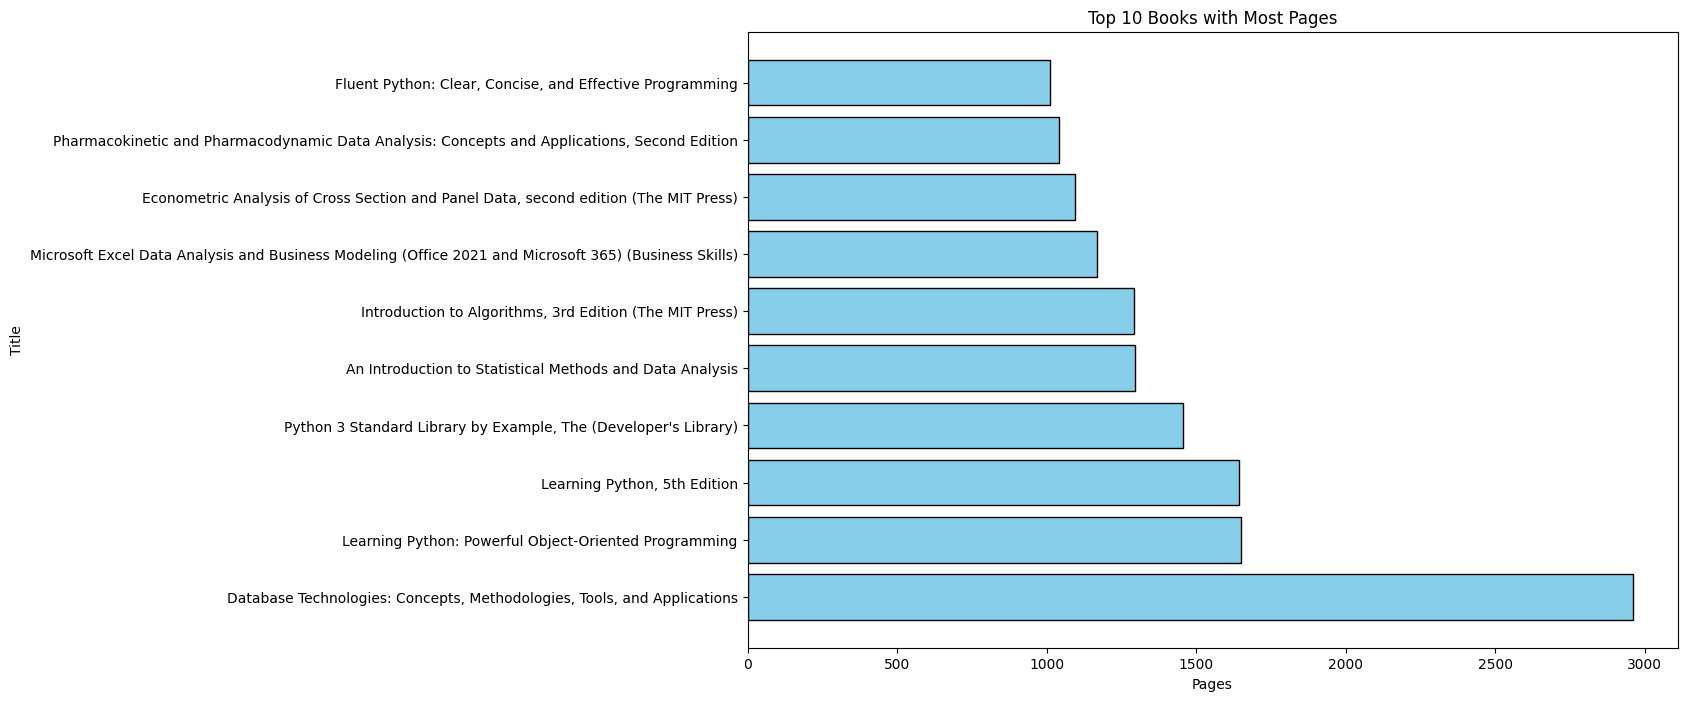

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.barh(books_most_pages['title'], books_most_pages['pages'], color='skyblue', edgecolor='black')
plt.xlabel('Pages')
plt.ylabel('Title')
plt.title('Top 10 Books with Most Pages')
plt.savefig('books.pdf', bbox_inches='tight')
# plt.show()

#### Phân tích ngôn ngữ (language)
Tính tỷ lệ sách theo ngôn ngữ.

Tỉ lệ sách theo ngôn ngữ:
English              93.885350
Unknown              5.350318 
Spanish              0.509554 
English, Japanese    0.127389 
English, French      0.127389 
Name: language, dtype: float64


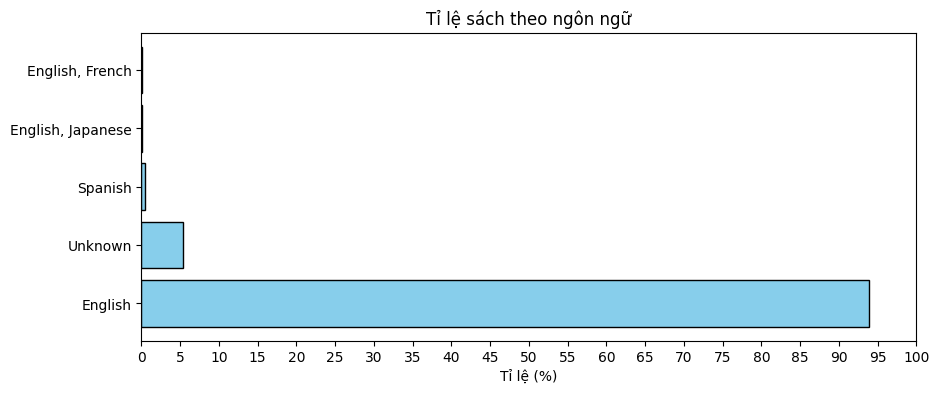

In [ ]:
# Tính tỷ lệ sách theo ngôn ngữ
language_counts = df['language'].value_counts()
total_books = len(df)
language_percentages = (language_counts / total_books) * 100

# Hiển thị thông tin tỷ lệ theo ngôn ngữ
print('Tỉ lệ sách theo ngôn ngữ:')
print(language_percentages)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 4))
plt.barh(language_percentages.index, language_percentages, color='skyblue', edgecolor='black')
plt.xlabel('Tỉ lệ (%)')
plt.xticks(range(0, 101, 5))
plt.title('Tỉ lệ sách theo ngôn ngữ')
plt.savefig('books-language.pdf', bbox_inches='tight')
# plt.show()

#### Phân tích nhà xuất bản (publisher)
Số sách của từng nxb

In [ ]:
len(df['publisher'].unique())

148

In [ ]:
# Phân tích nhà xuất bản:
# Đếm số sách từng nhà xuất bản
publisher_counts= df['publisher'].value_counts()
# Tạo DataFrame mới từ Series 'publisher_data'
publisher_df = publisher_counts.reset_index()
publisher_df.columns = ['publisher', 'count']
publisher_df.head(11)

,publisher,count
0,Packt Publishing,101
1,Independently published,81
2,O'Reilly Media,78
3,Unknown,73
4,No Starch Press,36
5,Wiley,29
6,Manning,26
7,Springer,23
8,Chapman and Hall/CRC,22
9,Cambridge University Press,19


<Figure size 1000x1000 with 0 Axes>

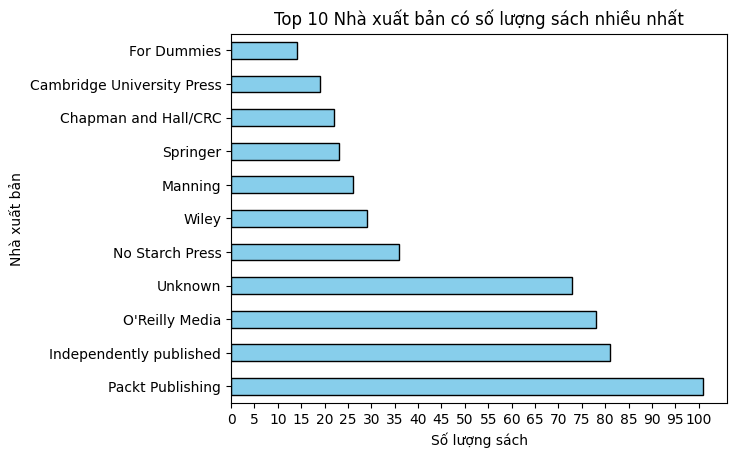

In [ ]:
# Tạo biểu đồ
plt.figure(figsize=(10, 10))
publisher_df[0:11].plot(kind='barh', x='publisher', y='count', color='skyblue', edgecolor='black', legend=False)
plt.xlabel('Số lượng sách')
plt.xticks(range(0, max(publisher_df['count']) + 1, 5))
plt.ylabel('Nhà xuất bản')
plt.yticks(rotation=0)
plt.title('Top 10 Nhà xuất bản có số lượng sách nhiều nhất')
plt.savefig('books-pub.pdf', bbox_inches='tight')

#### Phân tích giá cả (price)

In [ ]:
col = ['price']
price_data = df[col]

In [ ]:
# Gom nhóm giá sách vào các khoảng
price_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]
price_labels = [f'{i}-{j}' for i, j in zip(price_bins[:-1], price_bins[1:])]
price_data['price_group'] = pd.cut(price_data['price'], bins=price_bins, labels=price_labels, right=False)

<ipython-input-61-f6738777ba46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['price_group'] = pd.cut(price_data['price'], bins=price_bins, labels=price_labels, right=False)


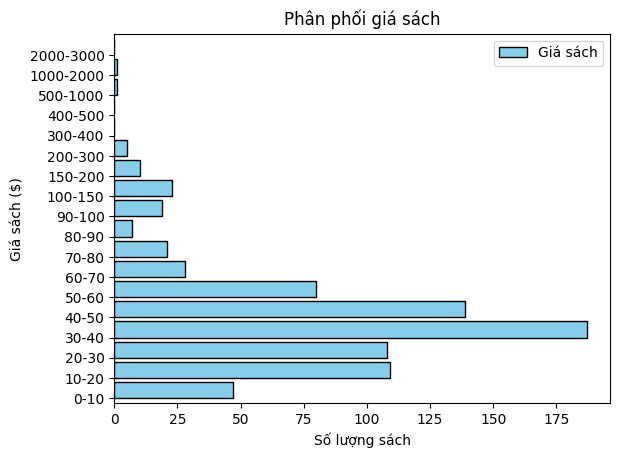

In [ ]:
# Tạo histogram cho phân phối giá sách
price_data['price_group'].value_counts().sort_index().plot(kind='barh', color='skyblue', edgecolor='black', width=0.8, position=0, label='Giá sách')
plt.xlabel('Số lượng sách')
plt.ylabel('Giá sách ($)')
plt.title('Phân phối giá sách')
plt.legend()
plt.savefig('price.pdf', bbox_inches='tight')
# plt.show()

### Phân tích đa biến

#### Phân tích năm xuất bản (publish_year)
số lượng sách được xuất bản mỗi năm

In [ ]:
original_df = df.copy()
df = df[df['publish_year'] != 'Unknown']

In [ ]:
book_counts = df.groupby('publish_year')['title'].count()
print('Số lượng sách được xuất bản mỗi năm là: ')
book_counts

Số lượng sách được xuất bản mỗi năm là: 


publish_year
1972.0    1  
1977.0    1  
1989.0    1  
1990.0    1  
1999.0    1  
2001.0    1  
2002.0    1  
2003.0    2  
2004.0    1  
2006.0    3  
2007.0    3  
2008.0    5  
2009.0    5  
2010.0    4  
2011.0    5  
2012.0    9  
2013.0    19 
2014.0    11 
2015.0    24 
2016.0    14 
2017.0    35 
2018.0    44 
2019.0    67 
2020.0    87 
2021.0    119
2022.0    213
2023.0    35 
Name: title, dtype: int64

In [ ]:
df = original_df.copy()

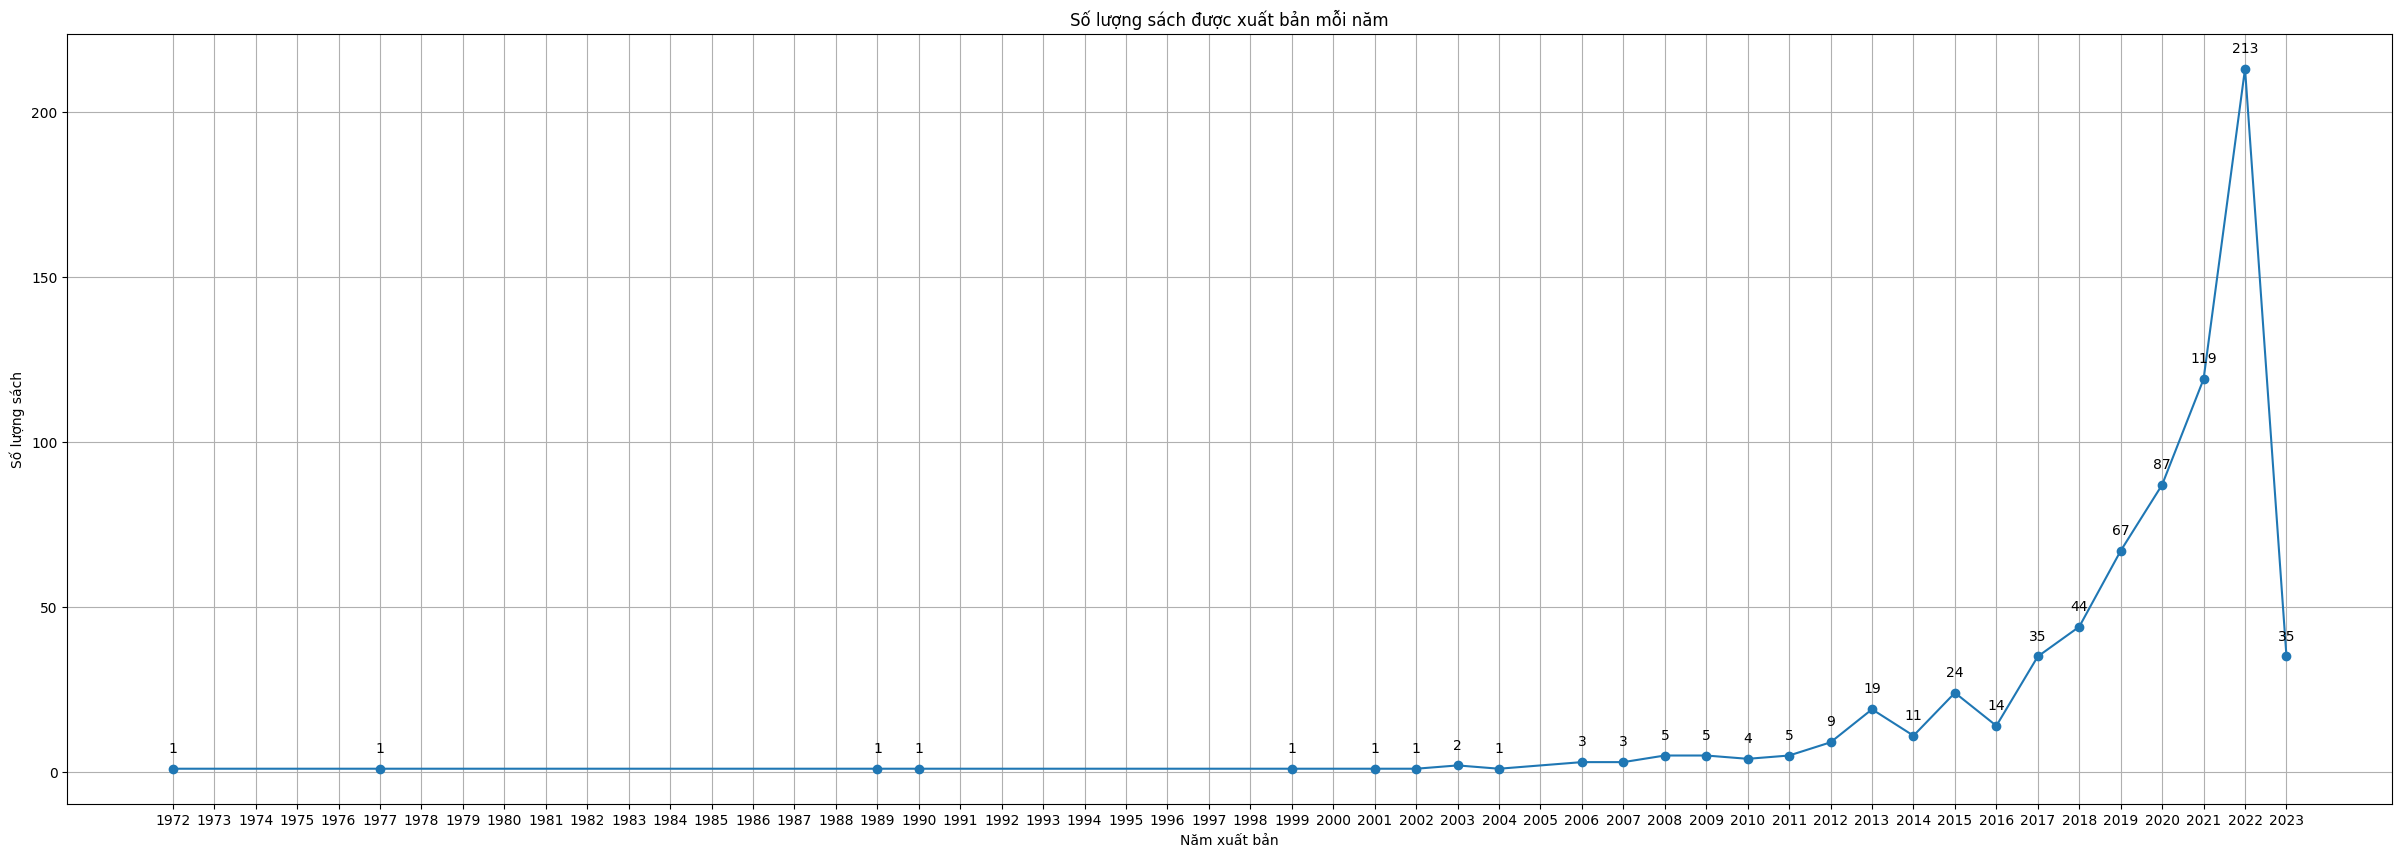

In [ ]:
# Vẽ biểu đồ đường
years = list(range(1972, 2024, 1))
plt.figure(figsize=(30, 10))
plt.plot(book_counts.index, book_counts.values, marker='o')
plt.xlabel('Năm xuất bản')
plt.xticks(years)
plt.ylabel('Số lượng sách')
plt.title('Số lượng sách được xuất bản mỗi năm')
plt.grid(True)
# Hiển thị số lượng sách từng năm trên mỗi chấm
for i, v in enumerate(book_counts.values):
    plt.text(book_counts.index[i], v + 5, str(v), ha='center')
plt.savefig('publisher_year.pdf', bbox_inches='tight')
# plt.show()

#### Phân tích tác giả (author)
Xác định tác giả phổ biến, xem xét đánh giá và giá của sách họ.

In [ ]:
# Chuyển đổi danh sách tác giả thành chuỗi
df['author'] = df['author'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Tính tổng số đánh giá và giá sách trung bình cho mỗi tác giả
author_analysis = df.groupby('author').agg(
    total_reviews=('n_reviews', 'sum'),
    average_price=('price', 'mean')
).reset_index()

# Sắp xếp theo tổng số đánh giá giảm dần
author_analysis = author_analysis.sort_values(by='total_reviews', ascending=False)

# Hiển thị thông tin
author_analysis.head(10)

,author,total_reviews,average_price
531,Unknown,99972,41.528523
168,Eric Matthes,9513,31.607500
93,Caroline Criado Perez,8819,14.990000
218,Inc. Barcharts,5962,5.950000
436,Ray Dalio,5517,21.490000
18,Al Sweigart,5286,28.128750
116,Cole Nussbaumer Knaflic,4073,29.830000
84,Brian Christian,3572,39.490000
340,Martin Kleppmann,3443,23.370000
525,Timothy C. Needham,3142,13.660000


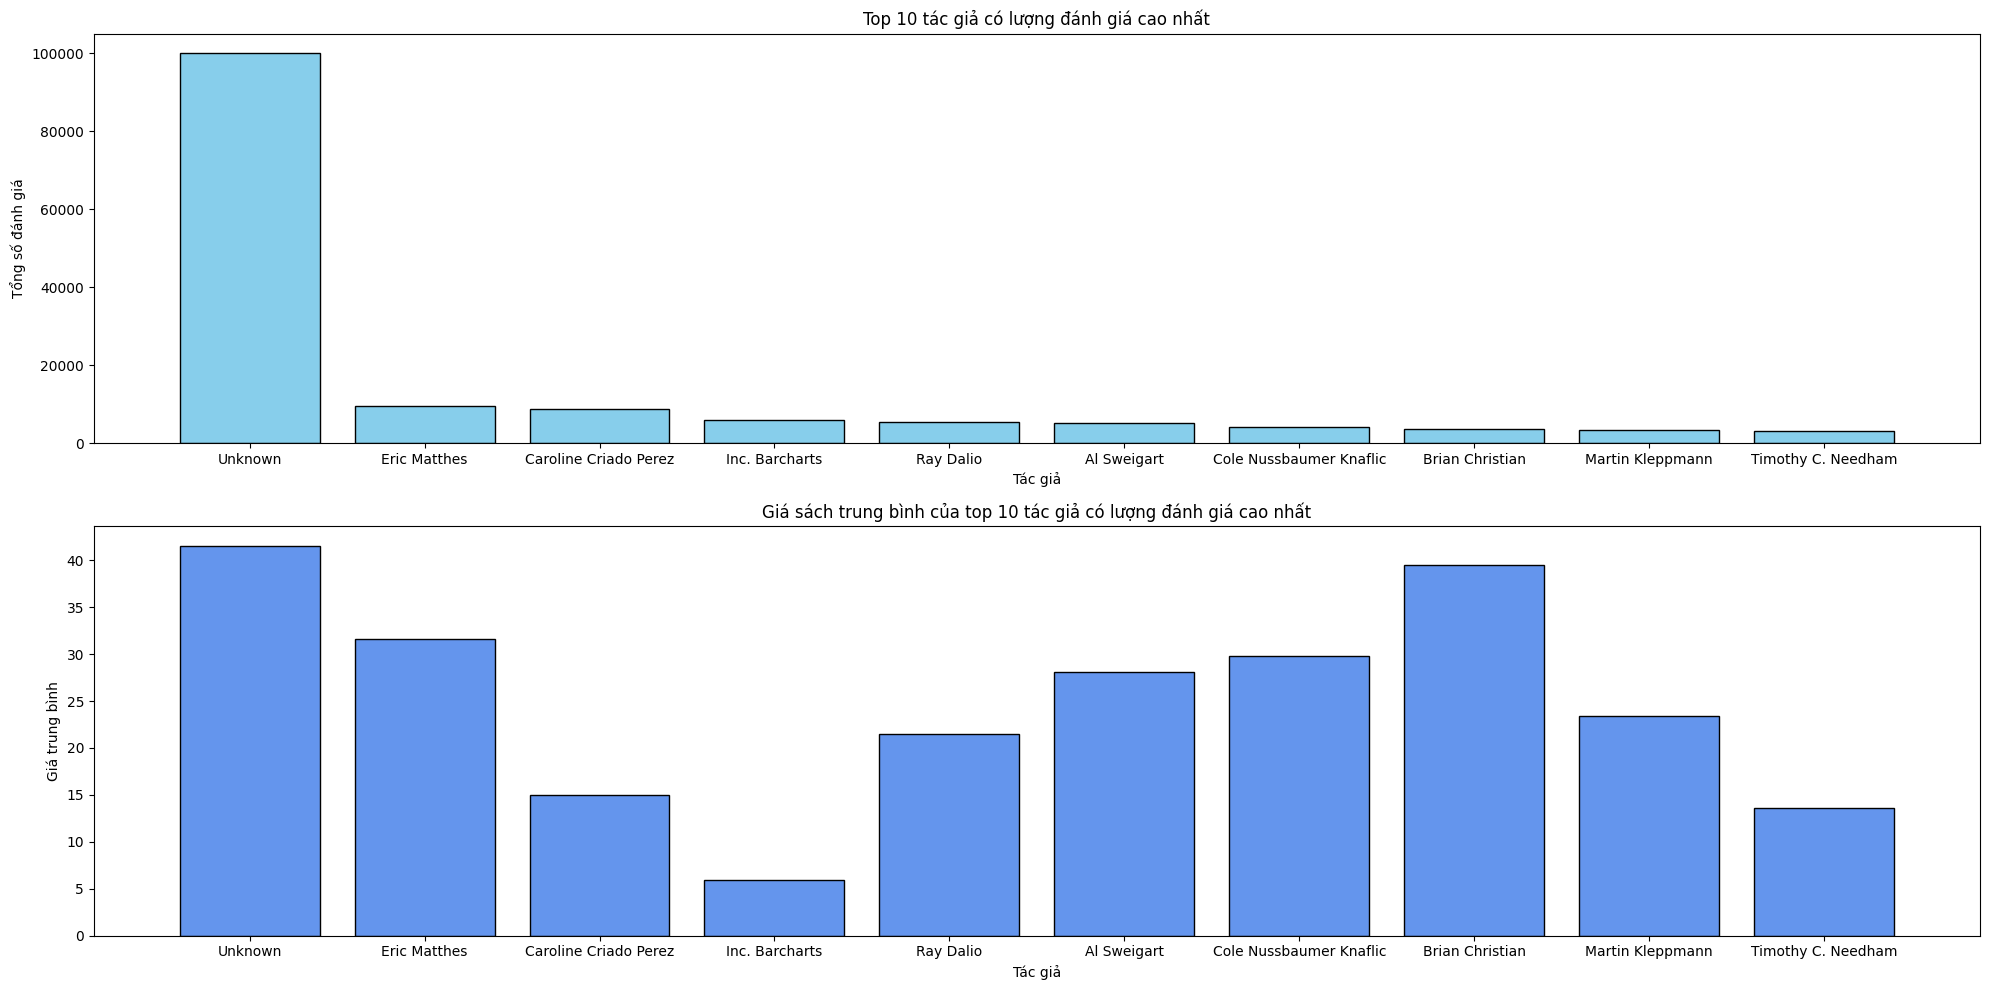

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(20, 10))

# Biểu diễn tổng số đánh giá
plt.subplot(2, 1, 1)
plt.bar(author_analysis.head(10)['author'], author_analysis.head(10)['total_reviews'], color='skyblue', edgecolor='black')
plt.xlabel('Tác giả')
plt.ylabel('Tổng số đánh giá')
plt.title('Top 10 tác giả có lượng đánh giá cao nhất')

# Biểu diễn giá sách trung bình
plt.subplot(2, 1, 2)
plt.bar(author_analysis.head(10)['author'], author_analysis.head(10)['average_price'], color='cornflowerblue', edgecolor='black')
plt.xlabel('Tác giả')
plt.ylabel('Giá trung bình')
plt.title('Giá sách trung bình của top 10 tác giả có lượng đánh giá cao nhất')

plt.tight_layout()
plt.savefig('author.pdf', bbox_inches='tight')
# plt.show()

#### Phân tích đánh giá (reviews)
Ranking sách và ưu tiên mua sắm: Xếp hạng sách dựa trên số lượng đánh giá và trung bình đánh giá cao nhất để đưa ra gợi ý mua sắm cho độc giả

In [ ]:
# Chọn các sách có số lượng đánh giá (n_reviews) và đánh giá trung bình (avg_reviews) cao
selected_books = df[(df['n_reviews'] > df['n_reviews'].mean()) & (df['avg_reviews'] > df['avg_reviews'].mean())]
# Sắp xếp kết quả theo thứ tự giảm dần của n_reviews
high_review = selected_books.sort_values(by='n_reviews', ascending=False)

print("Các sách có số n_reviews và avg_reviews cao, sắp xếp theo n_reviews giảm dần: ")
high_review[['title', 'author', 'n_reviews', 'avg_reviews']].head(10)

Các sách có số n_reviews và avg_reviews cao, sắp xếp theo n_reviews giảm dần: 


,title,author,n_reviews,avg_reviews
138,Start with Why: How Great Leaders Inspire Everyone to Take Action,Unknown,26560,4.6
22,Monty Python and the Holy Grail (Special Edition),Unknown,10103,4.7
706,Invisible Women: Data Bias in a World Designed for Men,Caroline Criado Perez,8819,4.7
778,Cracking the Coding Interview: 189 Programming Questions and Solutions,Unknown,7953,4.7
633,"Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming",Eric Matthes,7767,4.7
688,Principles for Dealing with the Changing World Order: Why Nations Succeed and Fail,Ray Dalio,5517,4.6
528,Monty Python's Life Of Brian - The Immaculate Edition [Blu-ray],Unknown,3678,4.8
569,Monty Python's Life Of Brian [DVD],Unknown,3678,4.8
332,Storytelling with Data: A Data Visualization Guide for Business Professionals,Cole Nussbaumer Knaflic,3493,4.6
181,"Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems",Martin Kleppmann,3443,4.8


In [ ]:
# Tạo DataFrame most_reviewed_books từ DataFrame high_review
most_reviewed_books = high_review.nlargest(10, 'n_reviews')
# Tạo biểu đồ bar
fig = px.bar(most_reviewed_books, y='title', x=['star5', 'star4', 'star3', 'star2', 'star1'], log_x=True, orientation='h')
fig.update_layout(
    width=1000,
    height=400,
    title="Top 10 sách có review cao nhất và phần trăm đánh giá của nó"
)
# fig.savefig('review.pdf', bbox_inches='tight')
fig.show()

#### Phân tích kích cỡ và trọng lượng của sách (weight vs volume)

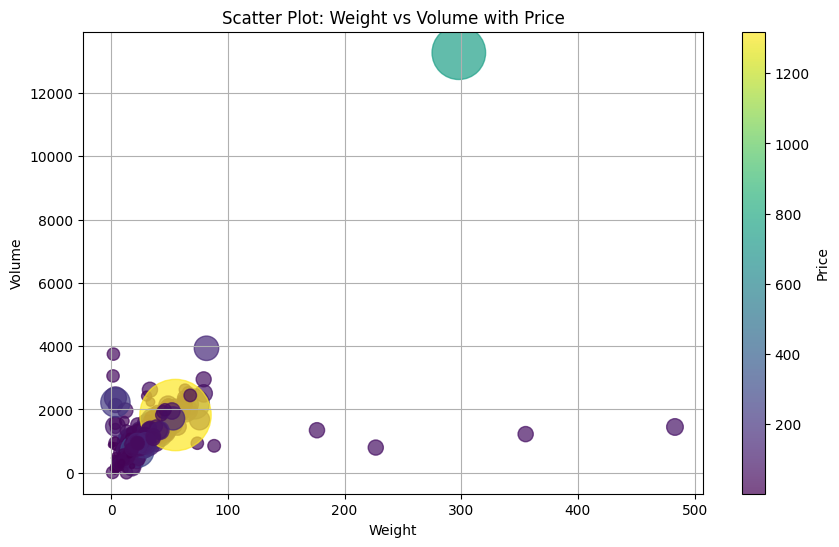

In [ ]:
# Vẽ biểu đồ scatter plot với kích thước điểm thay đổi theo giá sách
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['weight'], df['volume'], c=df['price'], cmap='viridis', alpha=0.7, s=df['price']*2)
plt.title('Scatter Plot: Weight vs Volume with Price')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.savefig('weight-volume.pdf', bbox_inches='tight')
# plt.show()

#### Phân tích tương quan

Phân tích sự tương quan của tất cả các biến

<ipython-input-72-f7d7d1ccc6d2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



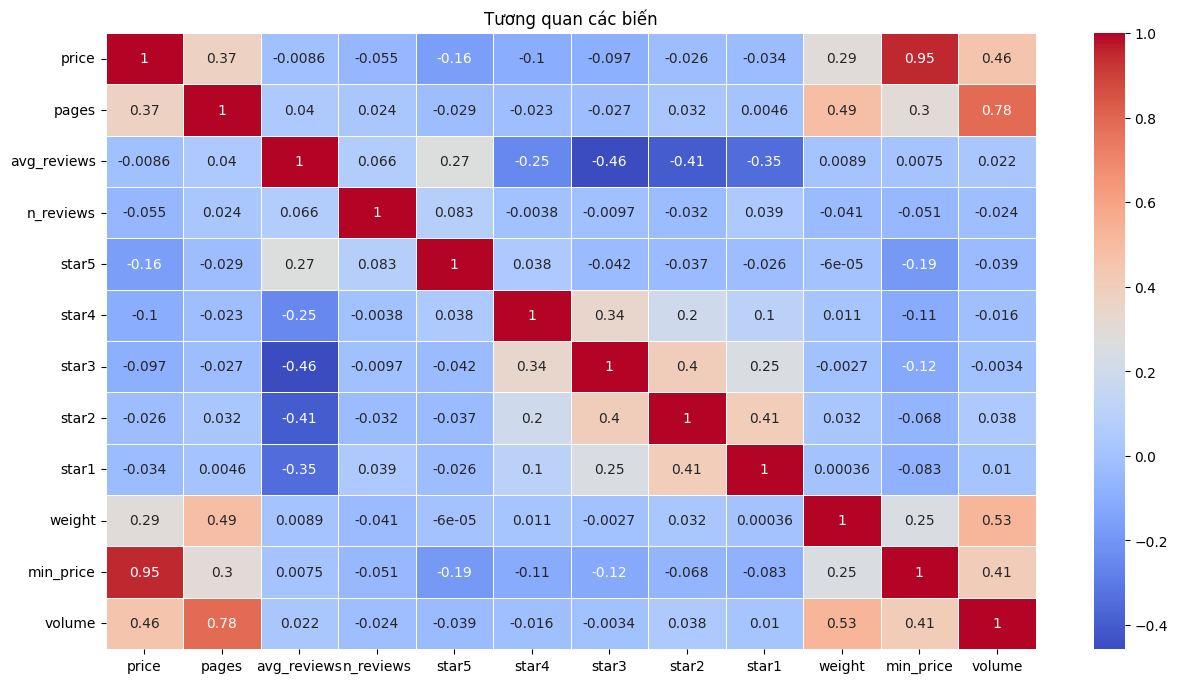

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()
# Tạo biểu đồ heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Tương quan các biến')
plt.savefig('corr.pdf', bbox_inches='tight')
# plt.show()

Phân tích đánh giá trị trường và độc giả

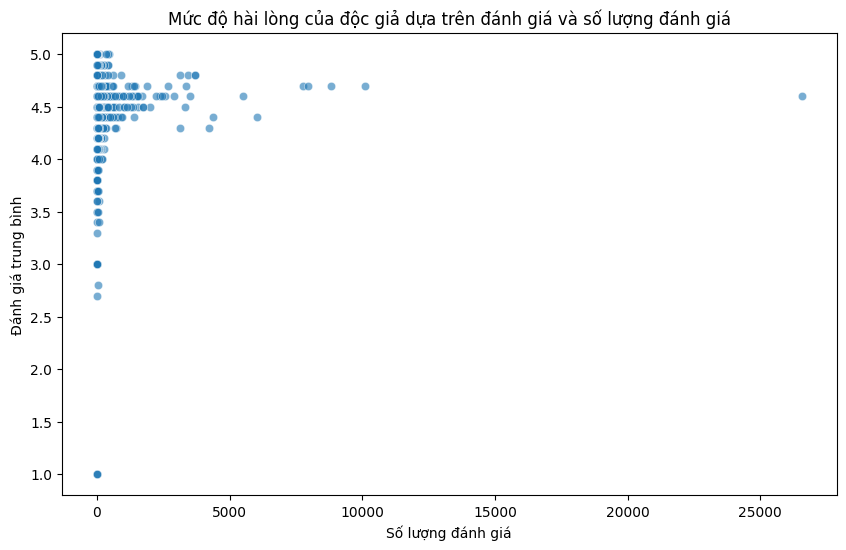

In [ ]:
# Tổng quan về mức độ hài lòng của độc giả dựa trên đánh giá và số lượng đánh giá.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='n_reviews', y='avg_reviews', alpha=0.6)
plt.title('Mức độ hài lòng của độc giả dựa trên đánh giá và số lượng đánh giá')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Đánh giá trung bình')
plt.savefig('satisf.pdf', bbox_inches='tight')

# plt.show()

Phân tích mối quan hệ giữa giá sách và đánh giá.

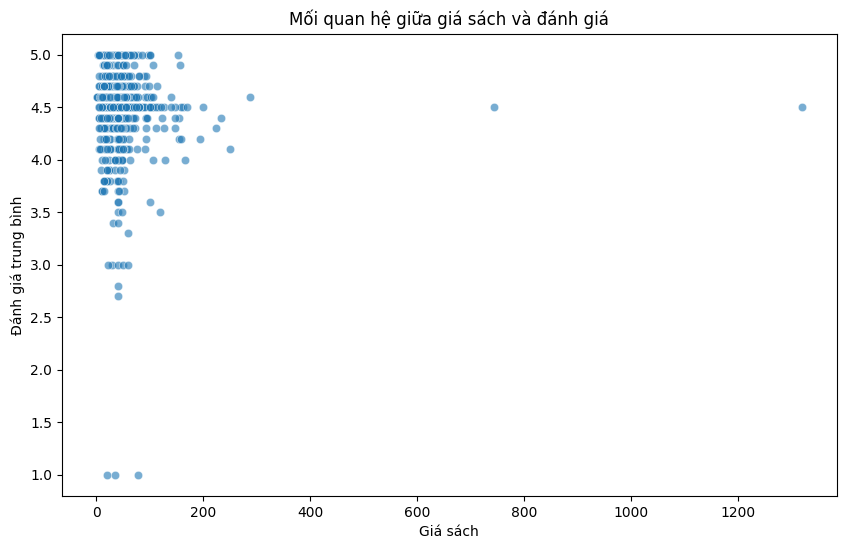

In [ ]:
# Xem xét mối quan hệ giữa giá sách và đánh giá.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='avg_reviews', alpha=0.6)
plt.title('Mối quan hệ giữa giá sách và đánh giá')
plt.xlabel('Giá sách')
plt.ylabel('Đánh giá trung bình')
plt.savefig('price-review.pdf', bbox_inches='tight')
# plt.show()

# Chương 5: Kiểm định giả thuyết

## Kiểm định t-test cho trung bình biến avg_reviews

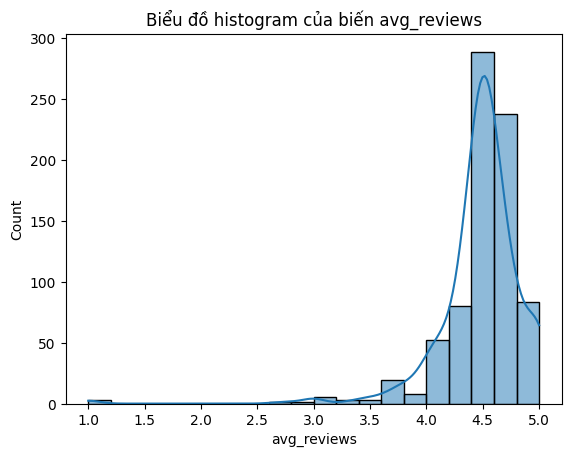

In [ ]:
sns.histplot(df['avg_reviews'], bins=20, kde=True);
plt.title("Biểu đồ histogram của biến avg_reviews")
plt.savefig("avg_review.pdf", bbox_inches="tight");

In [ ]:
from scipy.stats import ttest_1samp

print('H0: trung bình của avg_reviews >= 4.5')
print('H1: trung bình của avg_reviews <  4.5')
null_hypothesis_mean = 4.5
confidence_level = 0.98

t_statistic, p_value = ttest_1samp(df['avg_reviews'], null_hypothesis_mean)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 1 - confidence_level
if p_value < alpha:
    print("Bác bỏ H0.")
    print('--> Trung bình của avg_reviews < 4.5 .')

else:
    print('Châp nhận H0')
    print("Không có đủ bằng chứng để kết luận giả thuyết trung bình của avg_reviews < 4.5")

H0: trung bình của avg_reviews >= 4.5
H1: trung bình của avg_reviews <  4.5
T-statistic: -1.799585519368086
P-value: 0.07231049424561395
Châp nhận H0
Không có đủ bằng chứng để kết luận giả thuyết trung bình của avg_reviews < 4.5


## Kiểm định t cho 'price' giữa tiếng Anh và không phải tiếng Anh


In [ ]:
from scipy.stats import ttest_ind
print('H0: Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là bằng nhau.')
print('H1: Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là khác nhau.')
group1 = df[df['language'] == 'English']['price']
group2 = df[df['language'] != 'English']['price']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f'T-statistic: {t_stat :.4f}')
print(f'P-value: {p_value}')

if t_stat > 0:
    print('Trung bình giá của sách tiếng Anh lớn hơn trung bình của sách không phải tiếng Anh')
elif t_stat < 0:
    print('Trung bình giá của sách tiếng Anh nhỏ hơn trung bình của sách không phải tiếng Anh')

alpha = 0.05
if p_value < alpha:
    print('Bác bỏ H0')
    print('--> Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là khác nhau.')
else:
    print('Châp nhận H0')
    print('--> Không đủ bằng chứng để kết luận trung bình giá của sách tiếng Anh và không phải tiếng Anh là khác nhau.')

H0: Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là bằng nhau.
H1: Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là khác nhau.
T-statistic: 3.5749
P-value: 0.0004501513663379497
Trung bình giá của sách tiếng Anh lớn hơn trung bình của sách không phải tiếng Anh
Bác bỏ H0
--> Trung bình giá của sách tiếng Anh và sách không phải tiếng Anh là khác nhau.


## Kiểm định chi-square cho sự độc lập giữa ngôn ngữ và năm sách phát hành

In [ ]:
from scipy.stats import chi2_contingency
print('H0: Ngôn ngữ và năm sách phát hành là độc lập.')
print('H1: Ngôn ngữ và năm sách phát hành không độc lập.')
contingency_table = pd.crosstab(df['language'], df['publish_year'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2 :.4f}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print('Bác bỏ H0')
    print("Ngôn ngữ và năm sách phát hành không độc lập.")
else:
    print('Châp nhận H0')
    print("Không có đủ bằng chứng để kết luận Ngôn ngữ và năm sách phát hành không độc lập.")


H0: Ngôn ngữ và năm sách phát hành là độc lập.
H1: Ngôn ngữ và năm sách phát hành không độc lập.
Chi-square value: 317.2738
P-value: 1.8618677535783751e-22
Bác bỏ H0
Ngôn ngữ và năm sách phát hành không độc lập.


## Kiểm định mối tương quan giữa biến `language` và `publish_year` (chi square)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Contingency Table")
plt.xlabel("Publish Date")
plt.ylabel("Language")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
print('H0: Ngôn ngữ và năm sách phát hành là độc lập.')
print('H1: Ngôn ngữ và năm sách phát hành không độc lập.')
contingency_table = pd.crosstab(df['language'], df['publish_year'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2 :.4f}")
print(f"P-value: {p :.50f}")

alpha = 0.05
if p < alpha:
    print('Bác bỏ H0')
    print("Ngôn ngữ và năm sách phát hành không độc lập.")
else:
    print('Châp nhận H0')
    print("Không có đủ bằng chứng để kết luận Ngôn ngữ và năm sách phát hành không độc lập.")


H0: Ngôn ngữ và năm sách phát hành là độc lập.
H1: Ngôn ngữ và năm sách phát hành không độc lập.
Chi-square value: 317.2738
P-value: 0.00000000000000000000018618677535783751187610063481
Bác bỏ H0
Ngôn ngữ và năm sách phát hành không độc lập.


## Kiểm định Shapiro-Wilk


In [ ]:
import numpy as np
from scipy.stats import shapiro

sample_size = len(df['price'])

num_samples = 1000

shapiro_statistics = []

# Lấy nhiều mẫu từ phân phối chuẩn
for _ in range(num_samples):
    # Tạo mẫu ngẫu nhiên từ phân phối chuẩn
    random_sample = np.random.normal(size=sample_size)

    statistic, _ = shapiro(random_sample)
    shapiro_statistics.append(statistic)

observed_statistic, observed_p_value = shapiro(df['price'])

# Tính toán p-value theo phương pháp Monte Carlo
monte_carlo_p_value = (np.sum(np.array(shapiro_statistics) >= observed_statistic) + 1) / (num_samples + 1)

print(f"Shapiro-Wilk statistic (observed): {observed_statistic}")
print(f"P-value (observed): {observed_p_value}")
print(f"Monte Carlo p-value: {monte_carlo_p_value}")

if observed_p_value < 0.05:
    print("Bác bỏ H0: Biến price không tuân theo phân phối chuẩn.")
else:
    print("Không đủ bằng chứng để bác bỏ H0: Biến price tuân theo phân phối chuẩn.")

Shapiro-Wilk statistic (observed): 0.33458107709884644
P-value (observed): 0.0
Monte Carlo p-value: 1.0
Bác bỏ H0: Biến price không tuân theo phân phối chuẩn.


## Kiểm định t cho số lượng đánh giá trung bình giữa đánh giá 5 sao và các đánh giá khác


In [ ]:
from scipy.stats import ttest_ind
print('H0: Trung bình số lượng đánh giá 5 sao không lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.')
print('H1: Trung bình số lượng đánh giá 5 sao lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.')

t_stat, p_value = ttest_ind(df['star5'].fillna(0), df[['star1', 'star2', 'star3', 'star4']].fillna(0).sum(axis=1))

print(f'T-statistic: {t_stat :.4f}')
print(f'P-value: {p_value}')


alpha = 0.05
if p_value < alpha:
    print('Bác bỏ H0')
    print('--> Trung bình số lượng đánh giá 5 sao lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.')
else:
    print('Châp nhận H0')
    print('--> Không thể bác bỏ giả thuyết H0, không có sự khác biệt đáng kể về số lượng đánh giá 5 sao trung bình so với đánh giá 1-4 sao.')

H0: Trung bình số lượng đánh giá 5 sao không lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.
H1: Trung bình số lượng đánh giá 5 sao lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.
T-statistic: 36.7291
P-value: 1.2856327842110891e-213
Bác bỏ H0
--> Trung bình số lượng đánh giá 5 sao lớn hơn trung bình số lượng đánh giá từ 1 đến 4 sao.


## Phân lớp dữ liệu

In [ ]:
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,language,publisher,min_price,volume,publish_year
0,Data Analysis Using R (Low Priced Edition): A Primer for Data Scientist,Dr Dhaval Maheta,6.75,500,4.4,23,0.55,0.39,0.06,0.00,0.00,40.48,English,Notion Press Media Pvt Ltd,6.75,1547.512389,2021.0
1,"Head First Data Analysis: A learner's guide to big numbers, statistics, and good decisions",Unknown,33.72,484,4.3,124,0.61,0.20,0.09,0.04,0.06,31.36,English,O'Reilly Media,21.49,1188.389881,2009.0
2,Guerrilla Data Analysis Using Microsoft Excel: Overcoming Crap Data and Excel Skirmishes,Oz Du Soleil,32.07,274,4.7,10,0.87,0.13,0.00,0.00,0.00,22.40,English,Holy Macro! Books,32.07,871.996643,2022.0
3,"Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython",William Mckinney,53.99,547,4.6,1686,0.75,0.16,0.05,0.02,0.02,23.52,English,O'Reilly Media,53.99,1170.139608,2017.0
4,Excel Data Analysis For Dummies (For Dummies (Computer/Tech)),Paul Mcfedries,24.49,368,3.9,12,0.52,0.17,0.10,0.10,0.10,20.80,English,For Dummies,24.49,928.490227,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Data Science (The MIT Press Essential Knowledge series),Unknown,9.69,280,4.5,404,0.67,0.21,0.07,0.03,0.02,8.80,English,The MIT Press,9.69,322.251614,2018.0
825,Deep Learning: Engage the World Change the World,Michael Fullan,5.33,208,4.5,74,0.72,0.14,0.07,0.02,0.04,15.50,English,Corwin,8.55,539.134406,2017.0
826,Machine Learning in Finance: From Theory to Practice,Matthew F. Dixon,55.18,573,4.5,93,0.78,0.07,0.07,0.04,0.04,36.00,English,Springer,52.41,1158.348296,2020.0
827,Practical Deep Learning at Scale with MLflow: Bridge the gap between offline experimentation and online production,Yong Liu,44.99,288,4.8,8,0.83,0.17,0.00,0.00,0.00,17.60,English,Packt Publishing,44.99,738.954167,2022.0


In [ ]:
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc,roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.svm                 import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB

In [ ]:
df[df.columns[df.dtypes != 'object']]

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,min_price,volume
0,6.75,500,4.4,23,0.55,0.39,0.06,0.00,0.00,40.48,6.75,1547.512389
1,33.72,484,4.3,124,0.61,0.20,0.09,0.04,0.06,31.36,21.49,1188.389881
2,32.07,274,4.7,10,0.87,0.13,0.00,0.00,0.00,22.40,32.07,871.996643
3,53.99,547,4.6,1686,0.75,0.16,0.05,0.02,0.02,23.52,53.99,1170.139608
4,24.49,368,3.9,12,0.52,0.17,0.10,0.10,0.10,20.80,24.49,928.490227
...,...,...,...,...,...,...,...,...,...,...,...,...
824,9.69,280,4.5,404,0.67,0.21,0.07,0.03,0.02,8.80,9.69,322.251614
825,5.33,208,4.5,74,0.72,0.14,0.07,0.02,0.04,15.50,8.55,539.134406
826,55.18,573,4.5,93,0.78,0.07,0.07,0.04,0.04,36.00,52.41,1158.348296
827,44.99,288,4.8,8,0.83,0.17,0.00,0.00,0.00,17.60,44.99,738.954167


In [ ]:
def label_encoder(x):
    if x == 'Packt Publishing':
        return 1
    elif x == 'Independently published':
        return 2
    elif x == "O'Reilly Media":
        return 3
    else:
        return 4

X = df[df.columns[df.dtypes != 'object']]
y = np.array([label_encoder(publisher) for publisher in df['publisher']])

# Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
# Các mô hình ứng viên
models = [KNeighborsClassifier(n_neighbors = int(pow(X_train.shape[0], 1/2) / 2)),
          DecisionTreeClassifier(),
          GaussianNB(),
          SVC(kernel='rbf')]

In [ ]:
folds = 10
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = folds)
    print(f'Accuracy (trung bình) của mô hình {model_name} = {accuracies.mean():.4f}')

Accuracy (trung bình) của mô hình KNeighborsClassifier = 0.6560
Accuracy (trung bình) của mô hình DecisionTreeClassifier = 0.6574
Accuracy (trung bình) của mô hình GaussianNB = 0.3769
Accuracy (trung bình) của mô hình SVC = 0.6688
